In [1]:
import torch
import numpy as np
import scipy.io as sio
import os
import time
from scipy import stats
from EnsemblePursuit import EnsemblePursuitPyTorch

In [37]:
def STA(stimulus,response):
    stimulus=torch.cuda.FloatTensor(stimulus)
    response=torch.cuda.FloatTensor(response)
    receptive_field1=torch.inverse(torch.matmul(stimulus.t(),stimulus))
    receptive_field2=torch.matmul(stimulus.t(),response.view(response.size()[0],1))
    receptive_field=torch.matmul(receptive_field1,receptive_field2)
    print(receptive_field.size())
    return receptive_field

def reg_STA(stimulus,response,lambd=100):
    stimulus=torch.cuda.FloatTensor(stimulus)
    response=torch.cuda.FloatTensor(response)
    receptive_field1=torch.inverse(torch.matmul(stimulus.t(),stimulus)+lambd*torch.eye(stimulus.size()[1]).cuda())
    receptive_field2=torch.matmul(stimulus.t(),response.view(response.size()[0],1))
    receptive_field=torch.matmul(receptive_field1,receptive_field2)
    print(receptive_field.size())
    return receptive_field
                                  
                                  
    

In [16]:
X=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['resp'][0][0]
X[X<0]=0
images=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/images_natimg2800_all.mat')['imgs']
print(images.shape)
images=images.transpose((2,0,1))
print(images.shape)
images=images.reshape((2800,68*270))

print(images.shape)
#stim=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['istim'][0][0]

(68, 270, 2800)
(2800, 68, 270)
(2800, 18360)


In [3]:
neuron_init_dict={'method':'top_k_corr','parameters':{'T':10,'n_of_neurons':100,'min_assembly_size':8}}
ep=EnsemblePursuitPyTorch()
U_V,nr_of_neurons,U,V, cost_lst,seed_neurons=ep.fit_transform(X,0.05,100,neuron_init_dict)

sz torch.Size([5880, 10103])
top n 1608 0.5516875386238098
ensemble nr 0
cost tensor(0.9857, device='cuda:0')
top n 3183 0.6139754056930542
ensemble nr 1
cost tensor(0.9786, device='cuda:0')
top n 6415 0.533966064453125
ensemble nr 2
cost tensor(0.9746, device='cuda:0')
top n 3100 0.58597731590271
ensemble nr 3
cost tensor(0.9719, device='cuda:0')
top n 1076 0.5770801901817322
ensemble nr 4
cost tensor(0.9685, device='cuda:0')
top n 2545 0.5335924625396729
ensemble nr 5
cost tensor(0.9654, device='cuda:0')
top n 2657 0.579582691192627
top n 2854 0.5654461979866028
ensemble nr 6
cost tensor(0.9628, device='cuda:0')
top n 984 0.5813974738121033
ensemble nr 7
cost tensor(0.9609, device='cuda:0')
top n 3057 0.5366870760917664
ensemble nr 8
cost tensor(0.9579, device='cuda:0')
top n 4978 0.5288177132606506
ensemble nr 9
cost tensor(0.9561, device='cuda:0')
top n 2619 0.5164979100227356
top n 3643 0.5059649348258972
top n 9414 0.509863555431366
top n 5168 0.529632031917572
ensemble nr 10
cos

top n 2703 0.48767325282096863
top n 3057 0.4640381336212158
top n 6932 0.4621756672859192
ensemble nr 54
cost tensor(0.9021, device='cuda:0')
top n 3866 0.6593899130821228
top n 123 0.4569413363933563
top n 2687 0.48391610383987427
top n 1830 0.475118488073349
top n 2406 0.45820656418800354
top n 1842 0.49999555945396423
top n 1830 0.475118488073349
top n 7439 0.49369850754737854
top n 386 0.46663257479667664
top n 2030 0.46553561091423035
top n 1290 0.5185002088546753
top n 4562 0.49338921904563904
top n 1568 0.4821859300136566
top n 2601 0.5128015279769897
top n 3643 0.5038761496543884
top n 1283 0.4644008278846741
top n 984 0.5117988586425781
top n 221 0.4643592834472656
top n 4821 0.4824136793613434
top n 8101 0.5119056105613708
top n 386 0.46663257479667664
top n 3232 0.47668886184692383
top n 3954 0.5135230422019958
top n 2687 0.48391610383987427
top n 149 0.49399515986442566
top n 3121 0.4558955132961273
ensemble nr 55
cost tensor(0.9011, device='cuda:0')
top n 1290 0.518500804

top n 196 0.47775110602378845
top n 5030 0.41168877482414246
top n 9576 0.43189889192581177
top n 2188 0.46730348467826843
top n 6558 0.42354169487953186
top n 2650 0.521767795085907
top n 1035 0.4389757215976715
top n 1988 0.4504142701625824
top n 2651 0.4516483247280121
top n 7322 0.4169580042362213
ensemble nr 61
cost tensor(0.8960, device='cuda:0')
top n 5154 0.4709596335887909
top n 1672 0.4306182861328125
top n 3665 0.4048037528991699
ensemble nr 62
cost tensor(0.8953, device='cuda:0')
top n 4990 0.45501708984375
top n 3028 0.42549529671669006
top n 7003 0.4261344373226166
top n 2205 0.48788079619407654
top n 1442 0.4091322124004364
ensemble nr 63
cost tensor(0.8947, device='cuda:0')
top n 9970 0.4395628571510315
ensemble nr 64
cost tensor(0.8939, device='cuda:0')
top n 6742 0.4225175082683563
top n 5904 0.41659241914749146
ensemble nr 65
cost tensor(0.8932, device='cuda:0')
top n 3998 0.410554975271225
ensemble nr 66
cost tensor(0.8925, device='cuda:0')
top n 778 0.4105503261089

top n 1031 0.40854620933532715
top n 2328 0.4485839307308197
top n 2144 0.4342212378978729
top n 6161 0.40174150466918945
top n 3004 0.41480857133865356
top n 2144 0.4342212378978729
top n 648 0.4163142144680023
top n 699 0.5164030194282532
top n 742 0.3975934684276581
top n 3521 0.396388441324234
top n 2546 0.4176672101020813
top n 3813 0.395155668258667
top n 9296 0.40821585059165955
top n 8920 0.4041464924812317
top n 2093 0.41878482699394226
top n 149 0.4792105257511139
top n 1452 0.40119242668151855
top n 7868 0.40073996782302856
top n 6268 0.4010036885738373
top n 1483 0.4493105113506317
top n 532 0.39759859442710876
top n 8587 0.40984439849853516
top n 7357 0.3950720727443695
top n 1031 0.40854620933532715
top n 1077 0.4203053414821625
top n 6993 0.40098926424980164
top n 1283 0.46521568298339844
top n 2619 0.5151289701461792
top n 4151 0.43762069940567017
top n 6246 0.3973289430141449
top n 3057 0.4638502299785614
top n 2703 0.4873715341091156
top n 3726 0.4216561019420624
top 

top n 2069 0.4926159083843231
top n 2665 0.42240437865257263
top n 3726 0.4211159348487854
top n 7361 0.41441330313682556
top n 3674 0.4007335305213928
top n 3982 0.4441242218017578
top n 465 0.410326212644577
top n 5548 0.3955020308494568
top n 9574 0.4315696358680725
top n 1646 0.3948422372341156
top n 2911 0.403672456741333
top n 6763 0.41228705644607544
top n 2601 0.5131314396858215
top n 984 0.5113333463668823
top n 6197 0.4004543721675873
top n 1591 0.4017830789089203
top n 296 0.4008153975009918
top n 1031 0.40919771790504456
top n 1041 0.40002551674842834
top n 3962 0.4437997043132782
top n 3536 0.4010806083679199
top n 9459 0.419086217880249
top n 1506 0.3936712443828583
top n 145 0.4221816658973694
top n 32 0.41694074869155884
top n 2040 0.42784467339515686
top n 9020 0.405253142118454
top n 2684 0.4067264497280121
top n 3917 0.47445201873779297
top n 9608 0.39810463786125183
top n 2316 0.3941628336906433
top n 2999 0.40695449709892273
top n 8787 0.41267552971839905
top n 212

In [11]:
print(np.array(V).shape)

def test_train_split(data,stim):
    unique, counts = np.unique(stim.flatten(), return_counts=True)
    count_dict=dict(zip(unique, counts))

    keys_with_enough_data=[]
    for key in count_dict.keys():
        if count_dict[key]==2:
            keys_with_enough_data.append(key)

    filtered_stims=np.isin(stim.flatten(),keys_with_enough_data)

    #Arrange data so that responses with the same stimulus are adjacent
    z=stim.flatten()[np.where(filtered_stims)[0]]
    sortd=np.argsort(z)
    istim=np.sort(z)
    X=data[filtered_stims,:]
    out=X[sortd,:].copy()

    x_train=out[::2,:]
    y_train=istim[::2]
    x_test=out[1::2,:]
    y_test=istim[1::2]
    
    return x_train, x_test, y_train, y_test

stim=sio.loadmat('/home/maria/Documents/EnsemblePursuit/data/natimg2800_M170717_MP034_2017-09-11.mat')['stim']['istim'][0][0]
x_train, x_test, y_train, y_test=test_train_split(np.array(V.t()),stim)
print(x_train.shape)
#receptive_field=STA(stimulus,V)

(100, 5880)
(2800, 100)


In [33]:
receptive_field=STA(images,x_train[:,1].T)

torch.Size([18360, 1])


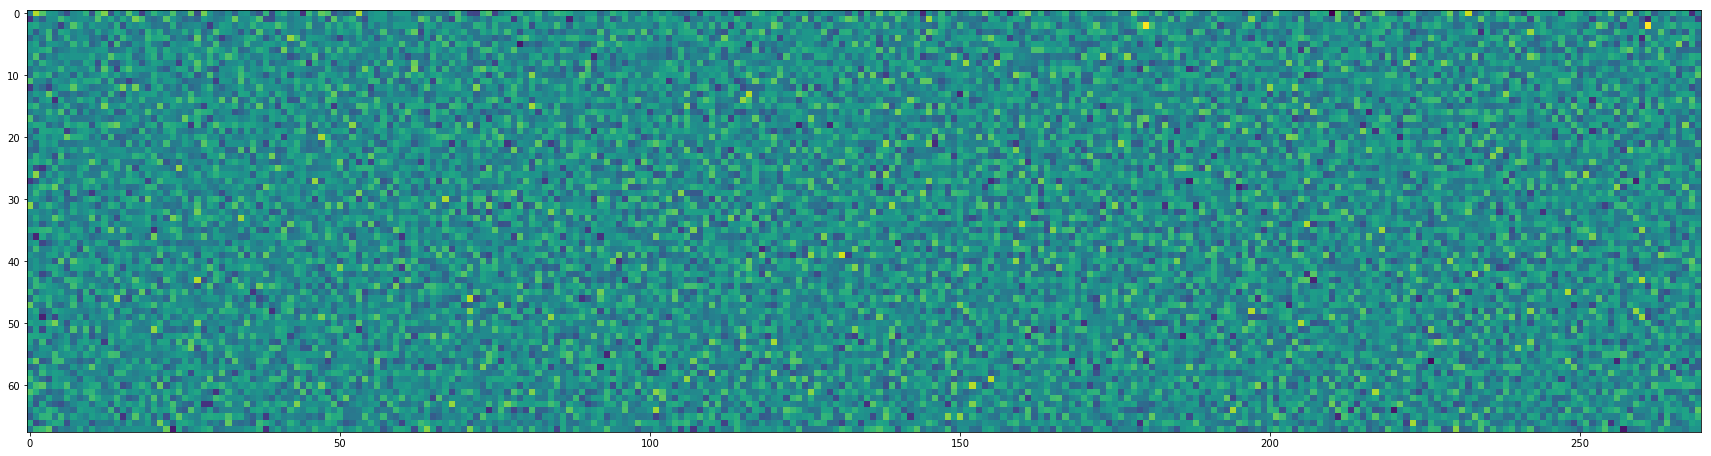

In [34]:
r=np.array(receptive_field.cpu()).reshape(68,270)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r)

torch.Size([18360, 1])


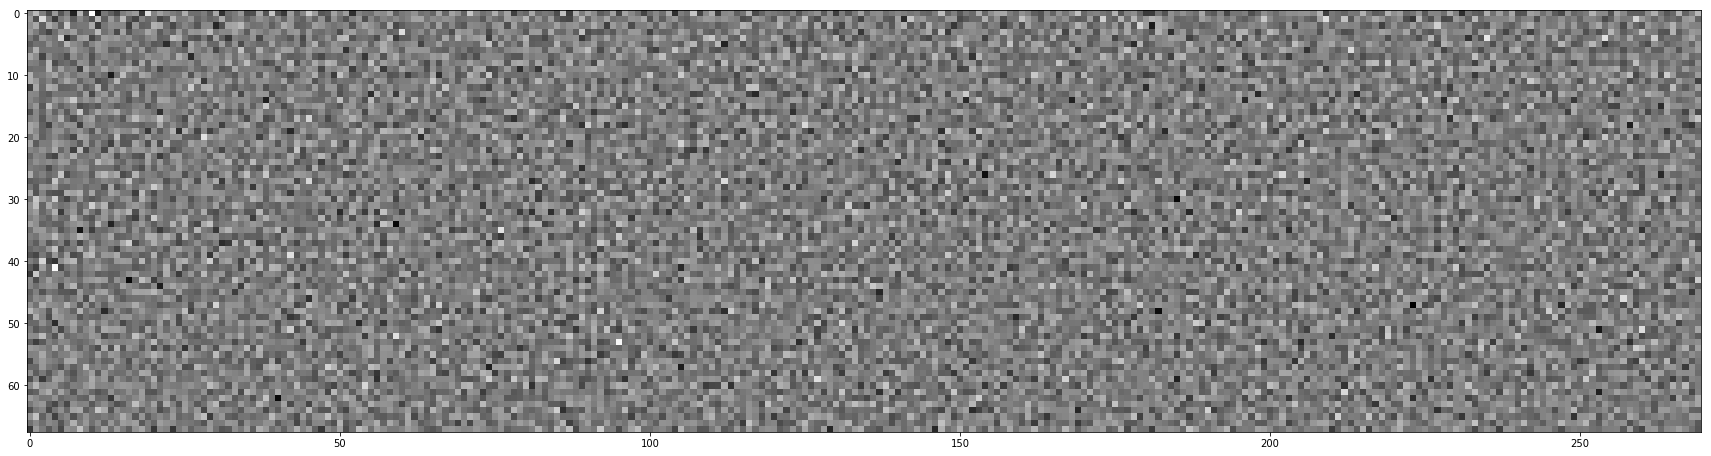

In [40]:
rec_f=reg_STA(images,x_train[:,1].T)
r=np.array(rec_f.cpu()).reshape(68,270)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [30, 30]
plt.imshow(r,cmap='gray')